In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%pip install tueplots
from tueplots import bundles

Note: you may need to restart the kernel to use updated packages.


In [2]:
results_2019 = pd.read_csv("../data/bac-results-2019.csv", index_col=0)
results_2020 = pd.read_csv("../data/bac-results-2020.csv", index_col=0)
results_2021 = pd.read_csv("../data/bac-results-2021.csv", index_col=0)

# convert to numeric what is possible
results_2019 = results_2019.apply(pd.to_numeric, errors='coerce').fillna(results_2019)
results_2020 = results_2020.apply(pd.to_numeric, errors='coerce').fillna(results_2020)
results_2021 = results_2021.apply(pd.to_numeric, errors='coerce').fillna(results_2021)

# replace NaNs with empty strings for easier searchability
results_2019.fillna('', inplace=True)
results_2020.fillna('', inplace=True)
results_2021.fillna('', inplace=True)

# combine the three years
results_all = pd.concat([results_2019, results_2020, results_2021], ignore_index=True, sort=False)

# separate dataset into romanians and minorities
ro = results_all[results_all['mother_tongue'] == '']
rp = results_all[results_all['mother_tongue'] != '']

C:\Users\cseke\anaconda3\envs\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
# 1st approach, assigning a point value to each level and summing it up

def calc_points(comp):
    points = {'A1':1, 'A2':2, 'B1':3, 'B2':4}
    p_sum = 0
    if isinstance(comp, str):
        for x in comp.split('-'):
            p_sum += points.get(x, 0)
    return p_sum

ro.loc[:, 'lang_points'] = ro.apply(lambda x: calc_points(x['modern_language_results']), axis=1)
rp.loc[:, 'lang_points'] = rp.apply(lambda x: calc_points(x['modern_language_results']), axis=1)

print("\nRomanians' average language skill points: {:0.3f}".format(ro['lang_points'].mean()))
print("minorities' average language skill points: {:0.3f}".format(rp['lang_points'].mean()))
# -> fairly similar


Romanians' average language skill points: 13.108
minorities' average language skill points: 13.347


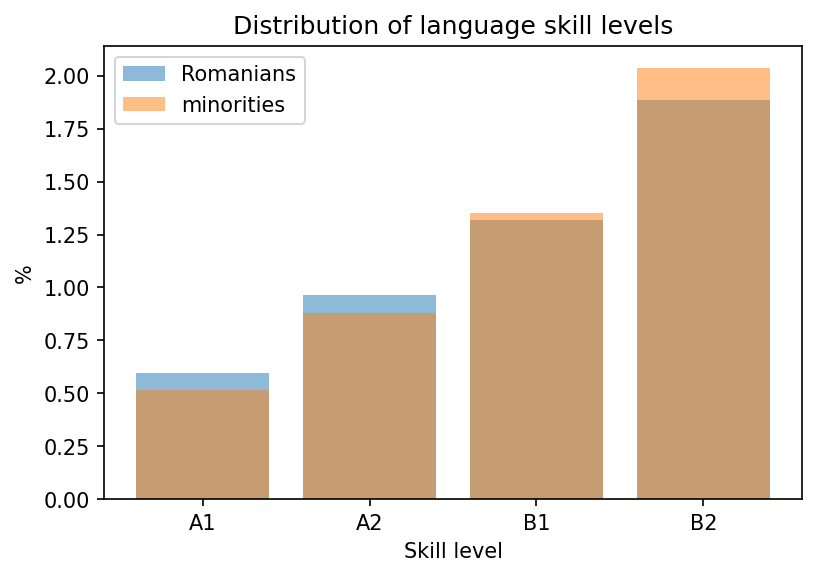

In [16]:
# 2nd approach, looking at the distribution of the language skills

def skill_list(comp):
    if isinstance(comp, str):
        return comp.split('-')
    return []

ro.loc[:, 'lang_skills'] = ro.apply(lambda x: skill_list(x['modern_language_results']), axis=1)
rp.loc[:, 'lang_skills'] = rp.apply(lambda x: skill_list(x['modern_language_results']), axis=1)


def plot_skill_distribution(df, ax):
    # gather all skill levels into a list
    skills = []
    for skill_list in df['lang_skills'].to_list():
        for skill in skill_list:
            skills.append(skill)

    # consolidate list
    skills_dict = {i:skills.count(i) for i in set(skills)}

    # normalize by population size and plot
    n = len(skills) / 5
    x = ['A1', 'A2', 'B1', 'B2']
    y = [skills_dict['A1']/n, skills_dict['A2']/n, skills_dict['B1']/n, skills_dict['B2']/n]
    ax.bar(x, y, align='center', alpha=.5)


fig, ax = plt.subplots(dpi=150)
plot_skill_distribution(ro, ax)
plot_skill_distribution(rp, ax)
ax.set_title("Distribution of language skill levels")
ax.set_xlabel('Skill level')
ax.set_ylabel('%')
ax.legend(["Romanians", "minorities"])
# -> minorities have more B2 and B1, and less A2 and A1